In [1]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import AutoDateFormatter, AutoDateLocator
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
datamap = pd.read_csv('Data/DataMap.csv',header=None,names = ['id','name','type','file'],index_col=None)

In [3]:
indicators = datamap[datamap['type'] == 'Economic']
indi_data = pd.concat(
    [
        pd.read_csv(name,header=0,names = ['id','date','value'])
        for name in 'Data/' + indicators['file'].astype(str) + '.csv'
    ],
    ignore_index=True
)

In [4]:
indi_data

,id,date,value
0,CPICHANGE,1947-03-31,0.017576
1,CPICHANGE,1947-04-30,0.000000
2,CPICHANGE,1947-05-31,-0.002273
3,CPICHANGE,1947-06-30,0.005923
4,CPICHANGE,1947-07-31,0.006793
...,...,...,...
8273,WTIPRICE,2019-08-31,55.070000
8274,WTIPRICE,2019-09-30,54.090000
8275,WTIPRICE,2019-10-31,54.020000
8276,WTIPRICE,2019-11-30,58.120000


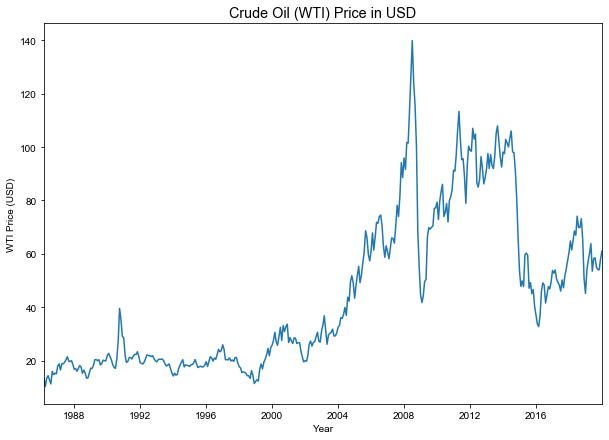

In [5]:
indi_data['date'] = pd.to_datetime(indi_data['date'])

fig = plt.figure(figsize=(10,7))
ax = plt.axes()
xtick_locator = AutoDateLocator()
xtick_formatter = AutoDateFormatter(xtick_locator)
sns.set_style(style='whitegrid')
sns.lineplot(x='date',y='value',data=indi_data[indi_data['id']=='WTIPRICE'],ax=ax)

ax.xaxis.set_major_locator(xtick_locator)
ax.xaxis.set_major_formatter(xtick_formatter)
ax.set_title('Crude Oil (WTI) Price in USD',fontsize='x-large')
ax.set_xlabel('Year')
ax.set_ylabel('WTI Price (USD)')
ax.set_xlim(indi_data[indi_data['id']=='WTIPRICE']['date'].min(),indi_data[indi_data['id']=='WTIPRICE']['date'].max())
plt.show()

In [6]:
yields = pd.read_csv('Data/TreasuryYields.csv',index_col='Date')
yields.index = pd.to_datetime(yields.index)
yields = yields.sort_index(ascending=False)
yields

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
2020-02-06,1.59,1.59,1.57,1.58,1.51,1.44,1.43,1.45,1.56,1.65,1.94,2.11
2020-02-05,1.55,1.56,1.57,1.57,1.49,1.44,1.43,1.46,1.57,1.66,1.97,2.14
2020-02-04,1.55,1.57,1.57,1.57,1.48,1.41,1.40,1.42,1.52,1.61,1.91,2.08
2020-02-03,1.56,1.57,1.57,1.56,1.46,1.36,1.34,1.35,1.45,1.54,1.84,2.01
2020-01-31,1.56,1.57,1.55,1.54,1.45,1.33,1.30,1.32,1.42,1.51,1.83,1.99
...,...,...,...,...,...,...,...,...,...,...,...,...
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04


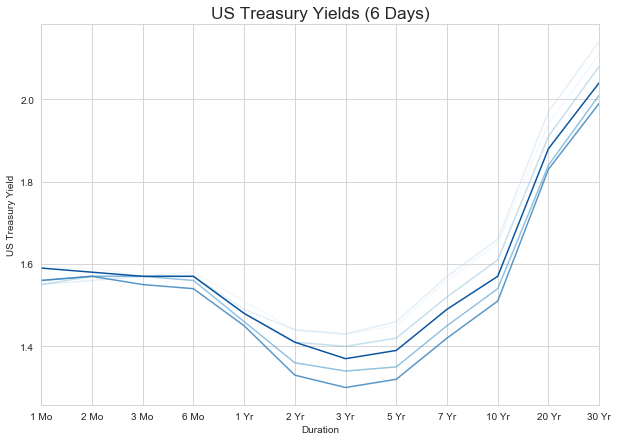

In [7]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes()
alphas = np.geomspace(0.3,1,num=6,endpoint=True)
palette = sns.color_palette("Blues", n_colors = 6)

for i in range(6):
    sns.lineplot(data=yields.iloc[i],sort=False,ax=ax,color = palette[i], alpha=alphas[i])
    
ax.set_title('US Treasury Yields (6 Days)',fontsize = 'xx-large')
ax.set_xlim(0,11)
ax.set_xlabel('Duration')
ax.set_ylabel('US Treasury Yield')
plt.show()

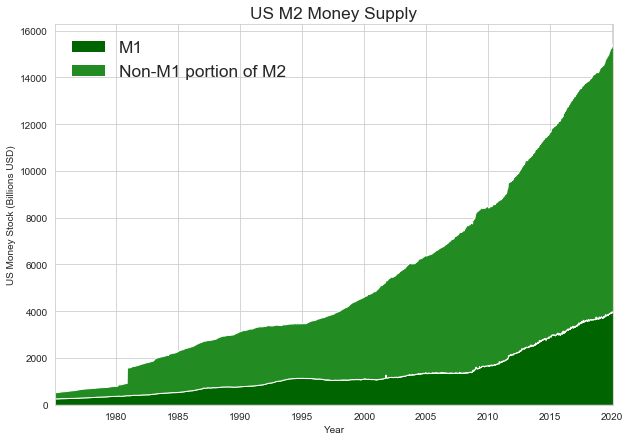

In [8]:
m1 = indi_data[indi_data['id'] == 'M1']
nonm1 = indi_data[indi_data['id'] == 'NONM1']
labels = ['M1', 'Non-M1 portion of M2']

fig, ax = plt.subplots(figsize=(10,7))
plt.style.use('seaborn-whitegrid')
ax.stackplot(m1['date'],m1['value'],nonm1['value'],labels=labels, colors=['darkgreen','forestgreen'])
ax.legend(loc='upper left',fontsize='xx-large')
xtick_locator = AutoDateLocator()
xtick_formatter = AutoDateFormatter(xtick_locator)
ax.xaxis.set_major_locator(xtick_locator)
ax.xaxis.set_major_formatter(xtick_formatter)
ax.set_xlim(m1['date'].min(),m1['date'].max())
ax.set_xlabel('Year')
ax.set_ylabel('US Money Stock (Billions USD)')
ax.set_title('US M2 Money Supply', fontsize='xx-large')
plt.show()

In [9]:
cpichange = indi_data[indi_data['id'] == 'CPICHANGE']
cpiyoy = cpichange.set_index('date').drop(labels='id',axis=1)
cpiyoy = ((1+cpiyoy).rolling(12).apply(np.prod,raw=True)-1)*100
cpiyoy

,value
date,
1947-03-31,NaN
1947-04-30,NaN
1947-05-31,NaN
1947-06-30,NaN
1947-07-31,NaN
...,...
2019-08-31,1.755208
2019-09-30,1.725328
2019-10-31,1.771007


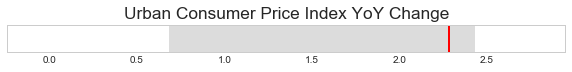

In [10]:
cpiyoy_data = cpiyoy.iloc[-60:]
band_width = cpiyoy_data.std()
band_mean = cpiyoy_data.mean()
y = [0,1]

fig, ax = plt.subplots(figsize=(10,.5))
ax.set_xlim(cpiyoy_data.min()[0],cpiyoy_data.max()[0])
ax.fill_betweenx(y,band_mean-band_width,band_mean+band_width,color='gainsboro')
ax.set_ylim(0,1)
ax.grid(b=None)
ax.set_yticklabels([])
ax.axvline(x=cpiyoy_data.iloc[-1][0],color='red',linewidth=2)
ax.set_title('Urban Consumer Price Index YoY Change',fontsize='xx-large')
plt.show()

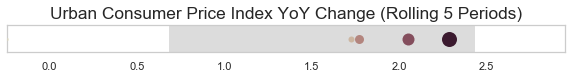

In [11]:
alphas = np.linspace(0.6,1,num=5,endpoint=True)
size = np.linspace(3,15,num=5)
y = [-.5,.5]

sns.set(style="whitegrid")
palette = sns.cubehelix_palette(start=.4,n_colors=5)

fig, ax = plt.subplots(figsize=(10,.5))
ax.set_title('Urban Consumer Price Index YoY Change (Rolling 5 Periods)',fontsize='x-large')

for i in range(5):
    sns.stripplot(data=cpiyoy_data.iloc[-i],color = palette[-i],alpha=alphas[-i],size=size[-i],jitter=0,orient='h',ax=ax)
ax.set_xlim(cpiyoy_data.min()[0],cpiyoy_data.max()[0])
ax.fill_betweenx(y,band_mean-band_width,band_mean+band_width,color='gainsboro')
ax.grid(b=None)
ax.set_yticklabels([])
ax.get_yaxis().set_visible(False)

In [12]:
fx = datamap[datamap['type'] == 'Currency']
fx_returns = pd.concat(
    [
        pd.read_csv(name,header=0,names = ['id','date','value'])
        for name in 'Data/' + fx['file'].astype(str) + '.csv'
    ],
    ignore_index=True
)
fx_returns

,id,date,value
0,AUD,2002-04-30,0.009002
1,AUD,2002-05-31,0.053903
2,AUD,2002-06-30,-0.006349
3,AUD,2002-07-31,-0.038871
4,AUD,2002-08-31,0.016620
...,...,...,...
1093,NZD,2019-09-30,-0.007453
1094,NZD,2019-10-31,0.024605
1095,NZD,2019-11-30,0.000624
1096,NZD,2019-12-31,0.047218


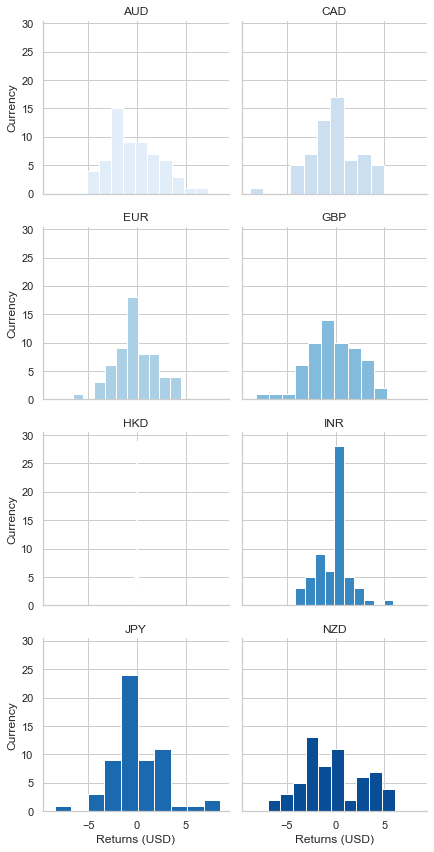

In [13]:
#Facet Grid

plotdata = fx_returns[fx_returns['date'] > '2014-12-31'][['id','value']].copy()
plotdata['value']=plotdata['value'].multiply(100)
pal = sns.color_palette(palette = 'Blues',n_colors = len(plotdata.id.unique()))

g = sns.FacetGrid(data=plotdata,col='id', hue='id',col_wrap=2,palette=pal)
g = (g.map(plt.hist,'value',bins=10)
     .set_titles("{col_name}")
    .set_axis_labels('Returns (USD)','Currency'))

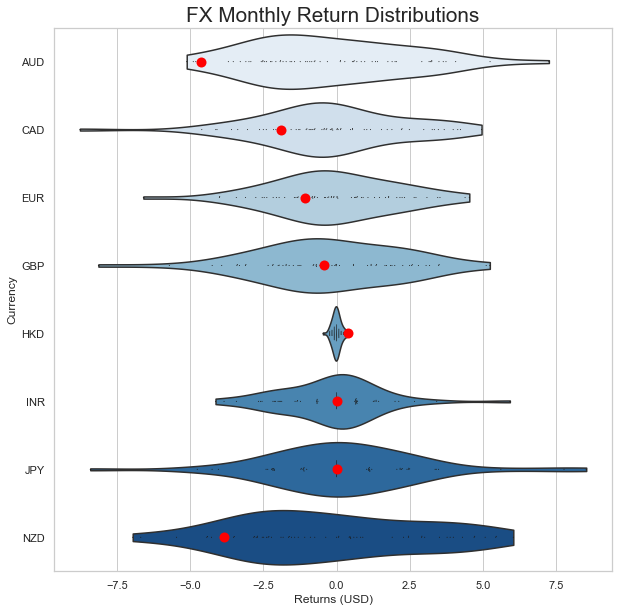

In [14]:
#Violin plot with strip

latest = plotdata.groupby('id').tail(1) 

fig, ax1 = plt.subplots(figsize=(10,10))
sns.violinplot(x='value',y='id',data=plotdata,inner=None,palette=pal,cut=0,scale='count', ax=ax1)
sns.swarmplot(x='value',y='id',size=1,data=plotdata, ax=ax1, color='k')
sns.stripplot(x='value',y='id',size=10,data=latest, ax=ax1,color='red',jitter=0)
ax1.set_xlabel('Returns (USD)')
ax1.set_ylabel('Currency')
ax1.set_title('FX Monthly Return Distributions',fontsize='xx-large')
plt.show()

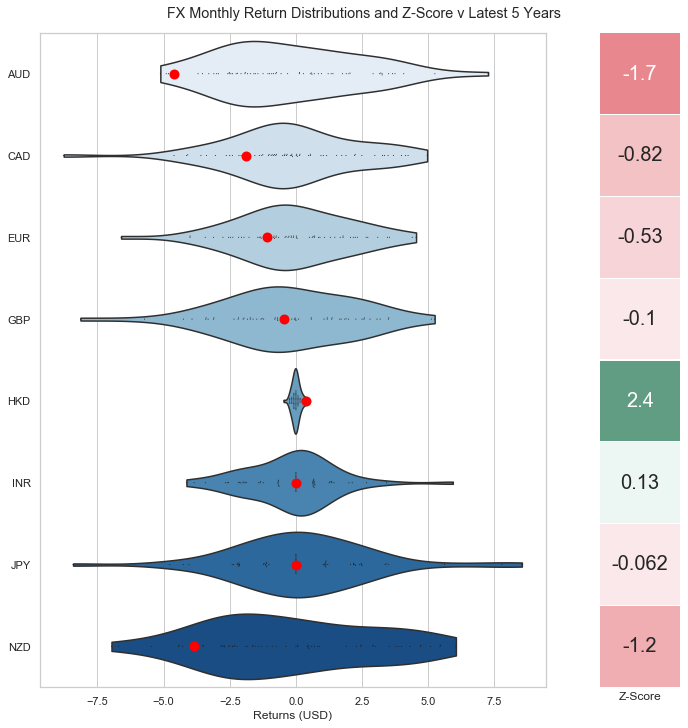

In [15]:
#Compute z-scores

means = plotdata.groupby('id').tail(60).groupby('id').mean()
stdevs = plotdata.groupby('id').tail(60).groupby('id').std()
last = plotdata.groupby('id').tail(1).set_index('id',drop=True)
zscores = (last - means)/stdevs
zscores

 
#Violin with z-score heatmap

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,10), gridspec_kw = {'width_ratios': [3,1]}, constrained_layout=True)
sns.violinplot(x='value',y='id',data=plotdata,inner=None,palette=pal,cut=0,scale='count', ax=ax1)
sns.swarmplot(x='value',y='id',size=1,data=plotdata, ax=ax1, color='k')
sns.stripplot(x='value',y='id',size=10,data=latest, ax=ax1,color='red',jitter=0)
ax1.set_ylabel('')
ax1.set_xlabel('Returns (USD)')

zpal = sns.diverging_palette(10, 150, n=20)
sns.heatmap(data = zscores,center=0,cmap=zpal,vmin=-3,vmax=3,annot=True, square= True,
            xticklabels = False, yticklabels = False, linewidths=.2, cbar=False,ax=ax2,annot_kws={'size': 20})
ax2.set_ylabel('')
ax2.set_xlabel('Z-Score')

fig.suptitle('FX Monthly Return Distributions and Z-Score v Latest 5 Years')
plt.show()

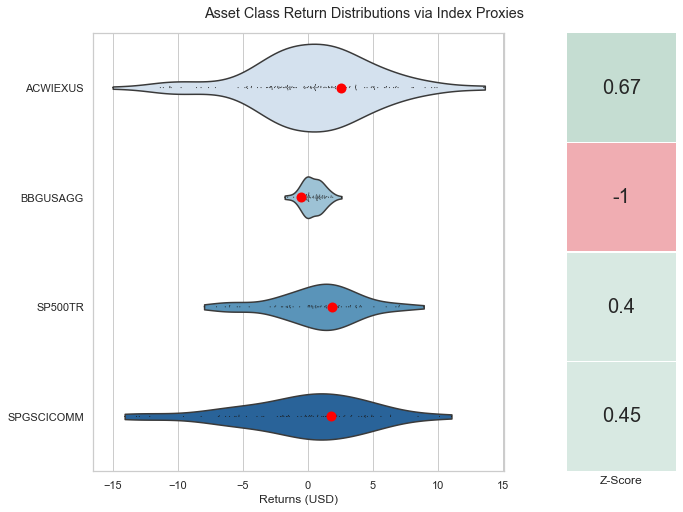

In [16]:
ix = datamap[datamap['type'] == 'Index']
ix_returns = pd.concat(
    [
        pd.read_csv(name,header=0,names = ['id','date','value'])
        for name in 'Data/' + ix['file'].astype(str) + '.csv'
    ],
    ignore_index=True
)

plotdata = ix_returns[ix_returns['date'] > '2014-12-31'][['id','value']].copy()
plotdata['value']=plotdata['value'].multiply(100)
latest = plotdata.groupby('id').tail(1) 
pal = sns.color_palette(palette = 'Blues',n_colors = len(plotdata.id.unique()))

#Compute z-scores

means = plotdata.groupby('id').tail(60).groupby('id').mean()
stdevs = plotdata.groupby('id').tail(60).groupby('id').std()
last = plotdata.groupby('id').tail(1).set_index('id',drop=True)
zscores = (last - means)/stdevs
zscores

#Violin with z-score heatmap

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,7), gridspec_kw = {'width_ratios': [2,1]}, constrained_layout=True)
sns.violinplot(x='value',y='id',data=plotdata,inner=None,palette=pal,cut=0,scale='count', ax=ax1)
sns.swarmplot(x='value',y='id',size=1,data=plotdata, ax=ax1, color='k')
sns.stripplot(x='value',y='id',size=10,data=latest, ax=ax1,color='red',jitter=0)
ax1.set_ylabel('')
ax1.set_xlabel('Returns (USD)')

zpal = sns.diverging_palette(10, 150, n=20)
sns.heatmap(data = zscores,center=0,cmap=zpal,vmin=-3,vmax=3,annot=True, square= True,
            xticklabels = False, yticklabels = False, linewidths=.2, cbar=False,ax=ax2,annot_kws={'size': 20})
ax2.set_ylabel('')
ax2.set_xlabel('Z-Score')

fig.suptitle('Asset Class Return Distributions via Index Proxies')
plt.show()

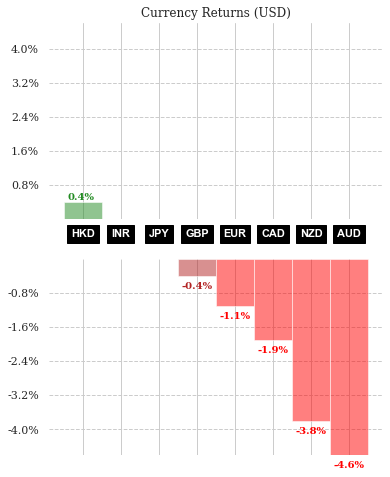

In [17]:
returns = fx_returns.groupby('id').tail(1)
returns = returns.rename(columns={'value':'return'})
returns = returns.set_index('id',drop=True).sort_values(by='return',ascending=False)
returns['return'] = returns['return'].multiply(100).round(1)

def color_mapping(value):
    if value > 0 and value <= 0.5:
        return 'forestgreen'
    elif value > 0.5 and value <= 1:
        return 'limegreen'
    elif value > 1:
        return 'lime'
    elif value < 0 and value >=-0.5:
        return 'firebrick'
    elif value < -0.5 and value >= -1:
        return 'tomato'
    elif value < -1:
        return 'red'
    else:
        return 'black'
    
def format_y(y,pos=None):
    return str(round(y,1)) + '%'
    
returns['color'] = returns['return'].apply(color_mapping)
y_max = returns['return'].abs().max()

pos_returns = returns.copy()
pos_returns.loc[pos_returns['return'] < 0,'return'] = 0
neg_returns = returns.copy()
neg_returns.loc[neg_returns['return'] > 0,'return'] = 0

fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(6,6))
ax1.bar(pos_returns.index,pos_returns['return'],width=1,color=pos_returns['color'].tolist(),alpha=.5)
ax2.bar(neg_returns.index,neg_returns['return'],width=1,color=neg_returns['color'].tolist(),alpha=.5)
ax1.set_title('Currency Returns (USD)',fontfamily='Serif')
ax1.xaxis.set_tick_params(labelbottom=True)
ax2.xaxis.set_tick_params(labelbottom=False)
for tk in ax1.get_xticklabels():
    tk.set_color('white')
    tk.set_backgroundcolor('black')
    tk.set_fontweight('bold')
    #tk.set_bbox(dict(alpha=.95))

ax1.set_ylim(0,y_max)
locator=ticker.MaxNLocator(prune='lower', nbins=6)
ax1.yaxis.set_major_locator(locator)
for i, v in enumerate(pos_returns['return'].tolist()):
    if v != 0:
        ax1.text(i-.4, v + .07, str(v)+'%', color=pos_returns['color'].tolist()[i], 
                 fontweight='bold', size= 'small',fontfamily='serif')
ax2.set_ylim(-y_max,0)
locator2=ticker.MaxNLocator(prune='upper', nbins=6)
ax2.yaxis.set_major_locator(locator2)
for i, v in enumerate(neg_returns['return'].tolist()):
    if v != 0:
        ax2.text(i-.4, v - .3, str(v)+'%', color=neg_returns['color'].tolist()[i], 
                 fontweight='bold', size= 'small', fontfamily='serif')

for i, ax in enumerate(fig.axes):
    ax.tick_params(bottom=False,left=False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.grid(which='major',axis='y',linestyle='dashed')
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y))
    for tk in ax.get_yticklabels():
        tk.set_fontfamily('serif')

    plt.subplots_adjust(bottom=2,top=3,hspace=.2)

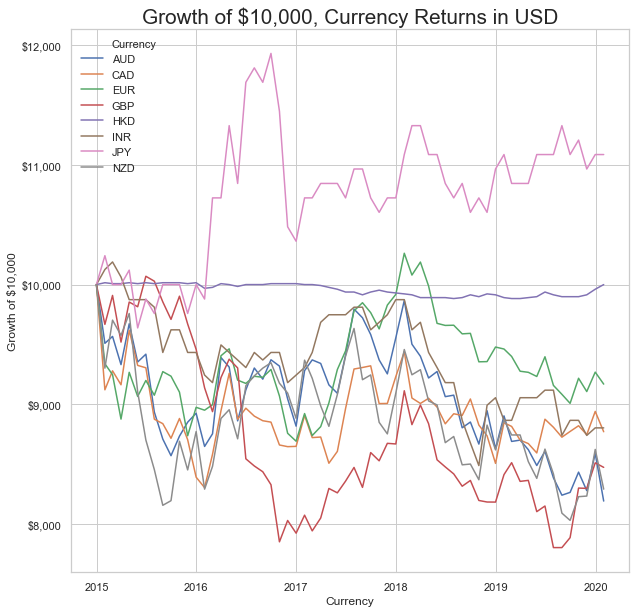

In [18]:
#G10K

fx_data = fx_returns[fx_returns['date'] > '2014-12-31'].reset_index(drop=True).copy()
dates = fx_data[['id','date']].copy()
grouped = fx_data.groupby('id')['value'].apply(lambda x: x.add(1).cumprod())
plotdata = dates.merge(grouped,how='left',left_index=True,right_index=True)
plotdata['G10K'] = plotdata['value'].multiply(10000)
plotdata = plotdata.drop('value',axis=1)

#Construct new rows with starting value
ids = [id_value for id_value in plotdata['id'].unique()]
firstdates = np.tile('12/31/2014',len(ids))
tenks = np.tile(10000,len(ids))
new_rows = pd.DataFrame(np.stack((ids,firstdates,tenks),axis=1),columns=plotdata.columns)

plotdata = pd.concat([new_rows,plotdata]).sort_values(by=['id','date']).reset_index()
plotdata['date'] = pd.to_datetime(plotdata['date'])
plotdata['G10K'] = pd.to_numeric(plotdata['G10K'])
plotdata = plotdata.rename(columns={'id':'Currency'})

#Plot growth of $10K
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.lineplot(data=plotdata,x='date',y='G10K',hue='Currency')
plt.xlabel('Currency')
plt.ylabel('Growth of $10,000')
fmt = '${x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set_title('Growth of $10,000, Currency Returns in USD',fontsize='xx-large')
plt.show()



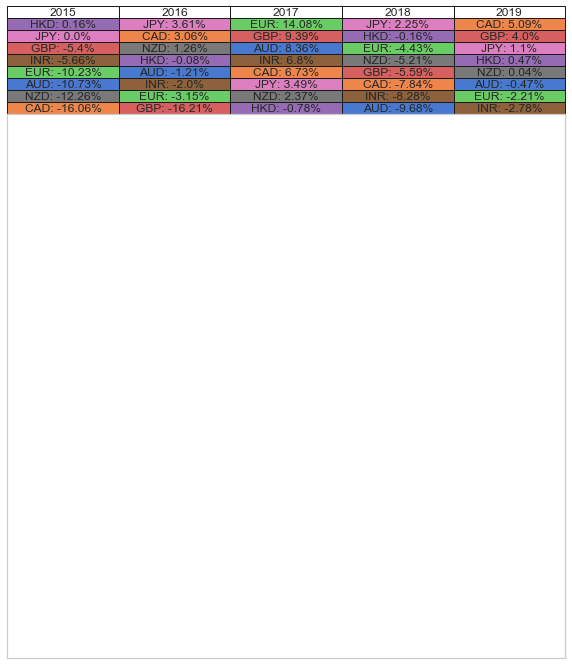

In [89]:
#'Periodic Table of Returns'

yearly = (fx_data.groupby(['id',fx_data['date'].astype('datetime64').apply(lambda x:x.year)])['value']
                 .apply(lambda x: np.prod(1+x)-1))
yearly = yearly.reset_index()
yearly = yearly[yearly['date'] < 2020]
yearly = yearly.rename(columns = {'id': 'Currency','date': 'Year','value':'Return'})
yearly['Return'] = yearly['Return'].multiply(100).round(2)
yearly['Comb'] = yearly[['Currency','Return']].values.tolist()

yearly_pivot = yearly.pivot(index='Currency',columns='Year',values='Comb')
yearly_pivot = yearly_pivot.reset_index(drop=True)
for col in yearly_pivot.columns:
    col_list = yearly_pivot[col].tolist() 
    col_list = sorted(col_list,key=lambda x: x[1],reverse=True)
    yearly_pivot[col] = pd.Series(col_list)

columns = yearly_pivot.columns
data = yearly_pivot.to_numpy(copy=True)

cur_table = data.copy()
cur_table = np.vectorize(lambda x: x[0])(cur_table)
currencies = yearly['Currency'].unique()
table_palette = sns.color_palette('muted',n_colors=len(currencies)).as_hex()
colors = np.empty(cur_table.shape,dtype=object)
for i in range(len(currencies)):
    for j in range(cur_table.shape[0]):
        for k in range(cur_table.shape[1]):
            if cur_table[j,k] == currencies[i]:
                colors[j,k] = table_palette[i]

data_formatted = np.vectorize(lambda x: str('{}: {}%').format(x[0],x[1]))(data)

fig, ax = plt.subplots(figsize=(10,10))
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
ax.table(cellText = data_formatted,cellColours=colors,colLabels=columns,cellLoc='center',loc='top')

plt.show()